# Nom: Alain Kuissu Kamga

#Computer Problem Set 1.1 The Cox-Ross-Rubinstein model

## import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.special import comb

#1)

##a) Build a function Sn(T, n, b, σ, j)

u = un = e
bhn+σ
√
hn , d = dn = e
bhn−σ
√
hn



In [2]:
S0 = 100

def Sn(T, n, b, σ, j):

  S0 = 100
  hn = T/n
  sigma_hn = σ*np.sqrt(hn)
  b_hn = b*hn
  u = np.exp(b_hn + sigma_hn)
  d = np.exp(b_hn - sigma_hn)
  return np.array([S0*(u**(j-i))*(d**i) for i in range(j+1)])


In [3]:
σ = 0.3
b = 0.05
n = 1
j = 1
T = 1
Sn(T, n, b, σ, j)

array([141.90675486,  77.88007831])

# b) Consider a European call option with maturity T and strike K ∈ R+. Build a function Payoffn(T, n, b, σ, K) which returns the payoff vector of the option at maturity.

In [4]:
def Payoffn(T, n, b, σ, K):

  return np.maximum(Sn(T, n, b, σ, n)-K, 0)

In [5]:
K = 90
Payoffn(T, n, b, σ, K)

array([51.90675486,  0.        ])

# c) Let r ≥ 0 be a constant interest rate. Build a function Calln(T, n, r, b, σ, K) which returns the price at time zero of the European call option

In [11]:
def Calln(T, n, r, b, σ, K):

    payoff_vector = Payoffn(T, n, b, σ, K)  # Calculate the payoff vector at maturity

    hn = T / n
    sigma_hn = σ * np.sqrt(hn)
    b_hn = b * hn
    u = np.exp(b_hn + sigma_hn)
    d = np.exp(b_hn - sigma_hn)
    q = (np.exp(r * hn) - d) / (u - d)

    payoff_j = Payoffn(T,n,b,σ,K)

    for idx in range(n-1):
      payoff_j = [np.exp(-r * hn) * (q * payoff_j[i] + (1 - q) * payoff_j[i+1]) for i in range(0,n-idx)]

    return np.exp(-r * hn) * (q * payoff_j[0] + (1 - q) * payoff_j[1])  # Option price at time zero


# Example:
S0 = 100   # Initial price
T = 1.0    # Total time
n = 3      # Number of periods
r = 0.05   # Constant interest rate (r)
b = 0.05   # Some value for b (you can adjust this)
σ = 0.2    # Volatility (σ)
K = 105    # Strike price

call_option_price = Calln(T, n, r, b, σ, K)
print(f"Price of the European Call Option: {call_option_price:.2f}")


Price of the European Call Option: 8.70


# d) At each time t nj:= jhn, denote by θnj the hedging strategy corresponding to the above European option. Build a function Deltan(T, n, r, b, σ, K, j) which returns the vector of all values of θnj.

In [7]:
def Deltan(T, n, r, b, σ, K, j):

    hn = T / n
    sigma_hn = σ * np.sqrt(hn)
    b_hn = b * hn
    u = np.exp(b_hn + sigma_hn)
    d = np.exp(b_hn - sigma_hn)
    q = (np.exp(r * hn) - d) / (u - d)

    # Calculate option prices at time j
    Snj = Sn(T, n, b, σ, j+1)
    payoff_j = Payoffn(T,n,b,σ,K)

    for idx in range(n-j-1):
      payoff_j = [np.exp(-r * hn) * (q * payoff_j[i] + (1 - q) * payoff_j[i+1]) for i in range(0,n-idx)]

    # Calculate delta values
    delta_values = [(payoff_j[0] - payoff_j[1]) / (Snj[0] - Snj[1])]
    delta_values = delta_values + [(payoff_j[i] - payoff_j[i+1]) / (Snj[i] - Snj[i+1]) for i in range(1,j)]

    return delta_values


## e) Examine the dependence effect of the strike K on the functions Calln, Deltan, and comment. You may use various values of Ki = 80 + i, i = 0, 1, 2, . . . , 40, a number of periods n = 50, and the parameters:

```
S0 = 100      # Initial price
T = 2.0       # Total time (in years)
n = 50        # Number of periods
r = 0.05      # Constant interest rate (r)
b = 0.05      # Constant b
σ = 0.3       # Volatility (σ)
```



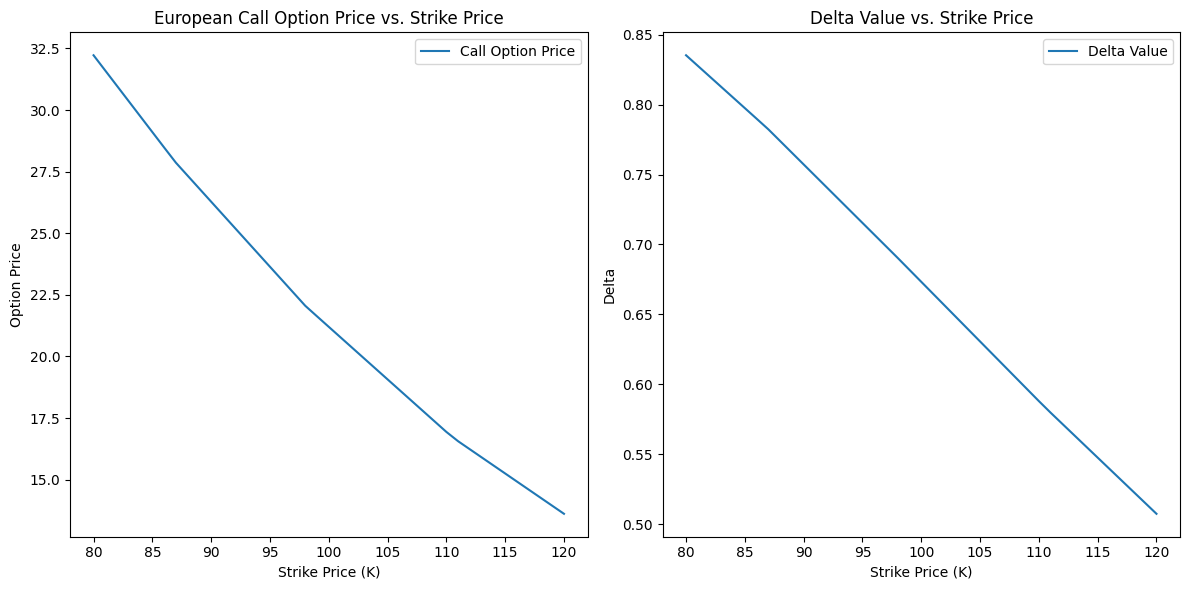

In [8]:
# Parameters
S0 = 100      # Initial price
T = 2.0       # Total time (in years)
n = 50        # Number of periods
r = 0.05      # Constant interest rate (r)
b = 0.05      # Constant b
σ = 0.3       # Volatility (σ)

# Create a range of strike prices Ki
strike_prices = np.arange(80, 121)  # Ki = 80 + i for i in [0, 1, 2, ..., 40]


# Calculate call option prices and delta values for each strike price Ki
call_option_prices = [Calln(T, n, r, b, σ, Ki) for Ki in strike_prices]
delta_values = [Deltan(T, n, r, b, σ, Ki, 0) for Ki in strike_prices]

# Plot the results
plt.figure(figsize=(12, 6))

# Plot Call Option Prices vs. Strike Prices
plt.subplot(1, 2, 1)
plt.plot(strike_prices, call_option_prices, label="Call Option Price")
plt.xlabel("Strike Price (K)")
plt.ylabel("Option Price")
plt.title("European Call Option Price vs. Strike Price")
plt.legend()

# Plot Delta Values vs. Strike Prices
plt.subplot(1, 2, 2)
plt.plot(strike_prices, delta_values, label="Delta Value")
plt.xlabel("Strike Price (K)")
plt.ylabel("Delta")
plt.title("Delta Value vs. Strike Price")
plt.legend()

plt.tight_layout()
plt.show()

## comments


1.   **We can see that as K increases, the european option price decrease at the same time**.
2.   **As K increases, delta decrease at the same time**. It seems to be a linear decline.




# 2)

## a) Build a function Call(T, r, σ, K) which returns the Black-Scholes price at time zero of the European call option. The cumulative distribution function of the centered standard gaussian distribution is available in most softwares (Python : scipy.stats.norm.cdf,VBA-excel: NormDist, Scilab: cdfnor, Matlab: cdf )

In [9]:
import scipy.stats as stats

def Call(T, r, σ, K):
    K_ = K*np.exp(-r*T)
    sqrt_v = σ*np.sqrt(T)
    d1 = (np.log(S0 / K_))/sqrt_v + sqrt_v/2
    d2 = d1 - sqrt_v

    # Use the cumulative distribution function (CDF) for the standard normal distribution
    N_d1 = stats.norm.cdf(d1)
    N_d2 = stats.norm.cdf(d2)

    call_option_price = S0 * N_d1 - K_ * N_d2

    return call_option_price

# Example usage:
S0 = 100   # Initial price
T = 2.0    # Total time (in years)
r = 0.05   # Constant interest rate (r)
σ = 0.3    # Volatility (σ)
K = 105    # Strike price

call_option_price = Call(T, r, σ, K)
print(f"Black-Scholes European Call Option Price: {call_option_price:.2f}")


Black-Scholes European Call Option Price: 18.99


## b) Define err(T, n, r, b, σ, K) := Calln(T ,n,r,b,σ,K)/Call(T ,r,σ,K)− 1, plot the graph of this relative error in terms of the number of periods n, and comment. You may use the parameters (1) togeteher with a strike K = 105.

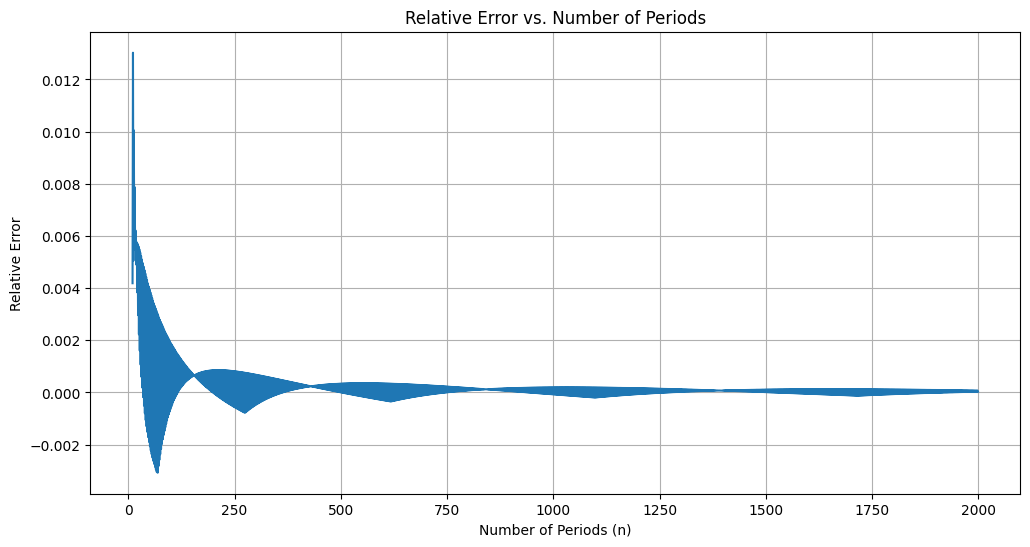

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def err(T, n, r, b, σ, K):
  return (Calln(T, n, r, b, σ, K)/Call(T, r, σ, K)) - 1


# Parameters
S0 = 100      # Initial price
T = 2.0       # Total time (in years)
r = 0.05      # Constant interest rate (r)
b = 0.05      # Constant b
σ = 0.3       # Volatility (σ)
K = 105       # Strike price

# Create a range of values for n
n_values = np.arange(10, 2000)

# Calculate relative errors for different values of n
relative_errors = [err(T, n, r, b, σ, K) for n in n_values]

# Plot the relative errors vs. n
plt.figure(figsize=(12, 6))
plt.plot(n_values, relative_errors)
plt.xlabel('Number of Periods (n)')
plt.ylabel('Relative Error')
plt.title('Relative Error vs. Number of Periods')
plt.grid(True)
plt.show()


## Comments

We can see on the figure that for the **Cox-Ross-Rubinstein** binomial model, the european call option price **converge** to the Black-Scholes european call option price as n ⟶ ∞. This is a numerical confirmation to the theory result from chapter 2 in the lecture about the convergence to the Black-Scholes european call option price as n ⟶ ∞ in **Cox-Ross-Rubinstein** binomial model.